# Precision calculations for Similarity Experiment 2 (covering three tune families in full)

# Import dependencies:

In [2]:
import glob
import matplotlib.pyplot as plt
import ml_metrics
import os

import numpy as np
import pandas as pd

# Set target tune families and list their similarity results csv files, which are to be used as input data for precision calculations:

In [66]:
baddies  = ['incipit__cos', 'incipit_cadence_cos', 'count', 'presence', 'presence_normalized', 'hamming_count_normalized',
                'hamming_presence', 'hamming_count', 'hamming_presence_normalized', 'weighted hamming_count_normalized',
                'weighted hamming_presence', 'weighted hamming_count', 'weighted hamming_presence_normalized', 'incipit__ham_w', 'incipit_cadence_ham_w']


# List all tune folders in tune family:
root_dir = "/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/"
tune_families = [path.name for path in os.scandir(root_dir) if os.path.isdir(path)]
print("Tune families:")
print(tune_families)
concatenated_inpaths = {fam: None for fam in tune_families}
for fam in tune_families:
    input_filepaths = []
    target_dir = root_dir + fam
    fam_subdirectories = glob.glob(f"{target_dir}/*/", recursive = True)
    # for each tune family, create list of lists, per:
    # top level list holds all tune folders
    # each lower-level list holds the filepaths within an individual tune folder, as long as they match the filter below.
    for dir in fam_subdirectories:
        filepaths = [path for path in glob.iglob(os.path.join(dir, "**", "*.csv"), recursive=True) if not ("patterns" or 'precision') in path]
        input_filepaths.append(filepaths)

    # create flattened version of the nested lists:
    flattened_tune_fam_input_filepaths = [path for subdir in input_filepaths for path in subdir]

    newpaths = []
    for path in flattened_tune_fam_input_filepaths:
        if path.split('/')[-1][:-4] not in baddies:
            newpaths.append(path)

    concatenated_inpaths[fam] = newpaths

    # Print all csv filepaths, i.e. the entire flattened list:

print("Input filepaths:")
print(concatenated_inpaths)


Tune families:
['hob_or_nob', 'johnny_cope', 'osullivans_march', 'gilderoy', 'road_to_lisdoonvarna', 'jennys_welcome_to_charlie', 'lord_mcdonalds', 'blackbird', 'greigs_pipes', 'drowsy_maggie']
Input filepaths:
{'hob_or_nob': ['/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit__lev.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_ham_w2.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit__ham.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_lev.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_

# Identify and extract ground truth data for all tune families:

In [67]:
# base path to The Session ground truth dir:
grd_truth_basepath = '/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/'

grd_truth_paths  = {fam: None for fam in tune_families}
for fam in tune_families:
    grd_truth_path = grd_truth_basepath + f'{fam}.csv'
    assert os.path.isfile(grd_truth_path)
    print(f"Ground truth path for {fam}:")
    print(grd_truth_path)
    grd_truth_paths[fam] = grd_truth_path


def format_input_data(in_path):
    """For a given tune family csv file located at 'in_path', this function extracts and lists all tune titles."""
    if 'precision' not in in_path:
        data = pd.read_csv(in_path)
        return data['title'].tolist()

# Execute above function and print sample output:
grd_truth = {}
for fam in grd_truth_paths:
    grd_truth[fam] = format_input_data(grd_truth_paths[fam])
    print(f"Ground truth data for {fam}:")
    for title in grd_truth[fam]:
        print(title)
    print('\n')

Ground truth path for hob_or_nob:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/hob_or_nob.csv
Ground truth path for johnny_cope:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/johnny_cope.csv
Ground truth path for osullivans_march:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/osullivans_march.csv
Ground truth path for gilderoy:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/gilderoy.csv
Ground truth path for road_to_lisdoonvarna:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/road_to_lisdoonvarna.csv
Ground truth path for jennys_welcome_to_charlie:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/jennys_welcome_to_charlie.csv
Ground truth path for lord_mcdonalds:
/Users/dannydiamond/NUIG/Polifonia/thesession/test_corpus/tune_fams_ground_truth/lord_mcdonalds.csv
Ground truth path for 

# Side-task:
# Update all similarity csv files, adding a Boolean column to improve readability and track tune family membership:

In [68]:
# TODO: revise output formatting from similarity search script to render below block obsolete
# NOTE: Do not re-run multiple times on same input data.
# If reformatting is necessary, toggle this block

print("Updating similarity csv files...")
for fam in concatenated_inpaths:
    for path in concatenated_inpaths[fam]:
        print(path)
        similarity_data = pd.read_csv(path)

        if 'Unnamed: 0' in similarity_data.columns:
            if similarity_data['Unnamed: 0'].dtype == 'int64':
                similarity_data.pop('Unnamed: 0')
            elif similarity_data['Unnamed: 0'].dtype == 'object' or str:
                similarity_data.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
        if 'count]' in similarity_data.columns:
            similarity_data.rename(columns={'count]': 'count'}, inplace=True)
        if 'presence]' in similarity_data.columns:
            similarity_data.rename(columns={'presence]': 'presence'}, inplace=True)
        if '_cos.csv' in path:
            similarity_data.rename({similarity_data.columns[1]: "Cosine similarity"}, axis=1, inplace=True)
        if 'tfidf' in path:
            similarity_data.rename({similarity_data.columns[1]: "Cosine similarity"}, axis=1, inplace=True)

        similarity_data['family member'] = similarity_data['title'].isin(grd_truth[fam])
        #     # print(similarity_data.head())
        similarity_data.to_csv(path)

print("Similarity csv files successfully updated.")





Updating similarity csv files...
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit__lev.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_ham_w2.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit__ham.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_lev.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_ham.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/ho

# Accuracy calculations

In [69]:
# Calculate accuracy stats

labels = {
    'incipit__lev': 'Incipit -- Levenshtein distance',
    # 'incipit_cadence_cos': 'Incipit & cadence -- Cosine similarity',
    'incipit_cadence_lev': 'Incipit & cadence -- Levenshtein distance',
    'incipit_cadence_ham' : 'Incipit & cadence -- Hamming distance',
    'incipit_cadence_ham_w2': 'Incipit & cadence -- CW Hamming distance',
    # 'incipit__cos': 'Incipit -- Cosine similarity',
    'incipit__ham': 'Incipit -- Hamming distance',
    'incipit__ham_w2': 'Incipit -- CW Hamming distance',
    'tfidf_vector_cos_similarity': 'TFIDF',
    'count_normalized': 'Motif -- Levenshtein distance',
    # 'presence': 'Levenshtein motif similarity -- presence',
    # 'count': 'Levenshtein motif similarity -- count',
    # 'presence_normalized': 'Levenshtein motif similarity -- presence (normalized)',
    # 'hamming_count_normalized': 'Hamming motif similarity -- count (normalized)',
    # 'hamming_presence': 'Hamming motif similarity -- presence',
    # 'hamming_count': 'Hamming motif similarity -- count',
    # 'hamming_presence_normalized': 'Hamming motif similarity -- presence (normalized)',
    # 'weighted hamming_count_normalized': '(weighted) Hamming motif similarity -- count (normalized)',
    # 'weighted hamming_presence': '(weighted) Hamming motif similarity -- presence',
    # 'weighted hamming_count': '(weighted) Hamming motif similarity -- count',
    # 'weighted hamming_presence_normalized': '(weighted) Hamming motif similarity -- presence (normalized)'
}

# labels = {
#     'incipit__lev': 'Incipit -- Levenshtein distance',
#     'incipit_cadence_lev': 'Incipit & cadence -- Levenshtein distance',
#     'incipit_cadence_ham' : 'Incipit & cadence -- Hamming distance',
#     'incipit_cadence_ham_w': 'Incipit & cadence -- (weighted) Hamming distance',
#     'incipit__ham': 'Incipit -- Hamming distance',
#     'incipit__ham_w': 'Incipit -- Hamming distance (weighted)',
#     'tfidf_vector_cos_similarity': 'TFIDF vector cosine similarity',
#     'count_normalized': 'Levenshtein motif similarity -- count (normalized)',
#     'count': 'Levenshtein motif similarity -- count',
# }

print("Calculating accuracy statistics...")
accuracy_results = []
for fam in concatenated_inpaths:
    for path in concatenated_inpaths[fam]:
        similarity_data = pd.read_csv(path)
        title = path.split('/')[-3]
        family = path.split("/")[-4]
        print(family)
        print(title)

        metric = ''
        for l in labels:
            if path.split('/')[-1][:-4] == l:
                metric = labels[l]
                print(metric)

        filtered_1 = similarity_data[similarity_data['family member'] == True]
        if not filtered_1.empty:
            filter_cutoff_idx = int(filtered_1.index[-1])
            print(f"Cutoff index: {filter_cutoff_idx}")
            filtered_2 = similarity_data.iloc[: filter_cutoff_idx + 1, ]
            thresh = np.NaN if filtered_2.empty else filtered_2.iloc[-1, 2].round(3)
            print(f'Threshold value: {thresh}')
            percentage_accuracy = filtered_2['family member'].value_counts(normalize=True, sort=False, dropna=False)
            if percentage_accuracy.empty:
                percentage_accuracy = pd.Series({True: 0, False: 1})

            idx = percentage_accuracy.index
            if True in idx:
                t = percentage_accuracy.at[True].round(3) * 100
        else:
            t = 0
            filter_cutoff_idx = np.NaN
            thresh = np.NaN

        print(f"Percentage accuracy: {t}")
        # res = [family, title, metric, filter_cutoff_idx, thresh, t]
        res = [family, title, metric, filter_cutoff_idx]
        accuracy_results.append(res)

# cols = ['family', 'title', 'metric', 'threshold idx', 'cutoff threshold value', '% accuracy']
cols = ['family', 'title', 'metric', 'results cutoff idx']
output = pd.DataFrame(accuracy_results, columns=cols)
# output['% accuracy'] = output['% accuracy'].round(2)
output['results cutoff idx'] = output['results cutoff idx'].round(0)
print(output.head())
output.to_csv(root_dir + 'accuracy_revised_PAPER.csv')

# Add average accuracy numbers

mean_accuracy_results = pd.DataFrame()
# for col in 'results cutoff idx', 'cutoff threshold value', '% accuracy':
#     mean_accuracy_results['mean ' + col] = output.groupby('metric')[col].mean().round(4)
mean_accuracy_results['mean results cutoff idx'] = output.groupby('metric')['results cutoff idx'].mean().round(4)
print(mean_accuracy_results.head())
mean_accuracy_results.to_csv(root_dir + 'mean_accuracy_revised_PAPER.csv')





Calculating accuracy statistics...
hob_or_nob
AnSeanduineDite1029
Incipit -- Levenshtein distance
Cutoff index: 489
Threshold value: 3
Percentage accuracy: 5.7
hob_or_nob
AnSeanduineDite1029
Incipit & cadence -- CW Hamming distance
Cutoff index: 293
Threshold value: 5.0
Percentage accuracy: 7.1
hob_or_nob
AnSeanduineDite1029
Incipit -- Hamming distance
Cutoff index: 477
Threshold value: 0.375
Percentage accuracy: 6.3
hob_or_nob
AnSeanduineDite1029
Incipit & cadence -- Levenshtein distance
Cutoff index: 480
Threshold value: 5
Percentage accuracy: 4.8
hob_or_nob
AnSeanduineDite1029
Incipit & cadence -- Hamming distance
Cutoff index: 497
Threshold value: 0.417
Percentage accuracy: 5.0
hob_or_nob
AnSeanduineDite1029
Incipit -- CW Hamming distance
Cutoff index: 401
Threshold value: 4.0
Percentage accuracy: 6.0
hob_or_nob
AnSeanduineDite1029
TFIDF
Cutoff index: 370
Threshold value: 0.036
Percentage accuracy: 3.8
hob_or_nob
AnSeanduineDite1029
Motif -- Levenshtein distance
Cutoff index: 193
T

# Run the precision ranking:

In [70]:
from IPython.display import display

def precision_at_k(actual, measured, k):
    """Simple precision at k implementation"""
    grd_truth = set(actual)
    predictions = set(measured[:k])
    return round(len(predictions.intersection(grd_truth)) / min(k, len(actual)), 2)

# set k values for calculations
k_vals = [1, 5, 10, 20]

# 'format_input_data() function is defined above in code block 3
# for tune_data in input_filepaths:
#     input_data = [format_input_data(path) for path in tune_data if 'precision' not in path]

# dict to store similarity results for all tunes, all metrics within each tune fam
similarity_results = {}
for fam in concatenated_inpaths:
    res = []
    for path in concatenated_inpaths[fam]:
        if 'precision' not in path:
            data = format_input_data(path)
            res.append(data)
    similarity_results[fam] = res



# Reformat filenames for use in output csv paths
results_filenames = {}
for fam in concatenated_inpaths:
    names = []
    for path in concatenated_inpaths[fam]:
        print(path)
        filename = path.split("/")[-1][:-4]
        tune_title = path.split("/")[-3]
        name = tune_title + "_" + filename
        names.append(name)
    results_filenames[fam] = names

# print(results_filenames)

# run and save p@k and ap@k calculations:
precision = {}
for fam in similarity_results:
    grd_truth_data = grd_truth[fam]
    res = []
    for similarity_data in similarity_results[fam]:
        # print("Ground truth:")
        # print(grd_truth_data)
        # print('\n')
        # print("Similarity results:")
        # print(similarity_data)
        # print('\n')
        patk = [round(precision_at_k(grd_truth_data, similarity_data, k), 2) for k in k_vals]
        average_patk = [round(ml_metrics.apk(grd_truth_data, similarity_data, k), 2) for k in k_vals]
        res.append(patk + average_patk)

    precision[fam] = res
    # we have a list of lists
    # top list corresponds to each tune in fam
    # lower lists are the 8 similarity metrics' results


def reformat_idx(idx, mapper_dict):

    split_name = idx.split("_")
    suffix = '_'.join(split_name[1:])
    row_name = split_name[0] + ": " + mapper_dict[suffix]
    return row_name


# format, shape and print results data:
conc_results = []
for fam in results_filenames:
    output_mapper = dict(zip(results_filenames[fam], precision[fam]))
    results = pd.DataFrame(output_mapper).T
    results.columns = [[f'precision @ {k}' for k in k_vals] + [f'AP @ {k}' for k in k_vals]]
    indices = results.index.to_series()
    reformatted_indices = indices.apply(reformat_idx, args=[labels])
    results.set_index(reformatted_indices.astype(str), inplace=True, drop=True)
    results.index = results.index.str.split(": ",expand=True)
    results.reset_index(inplace=True, drop=False)
    results.rename(columns={'level_0': 'title', 'level_1': 'metric'}, inplace=True)
    outpath = f'{root_dir}{fam}/{fam}_precision_revised_PAPER.csv'
    conc_results.append(results)
    results.to_csv(outpath)

/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit__lev.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_ham_w2.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit__ham.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_lev.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/structural_results/incipit_cadence_ham.csv
/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/AnSeanduineDite1029/stru

In [71]:
conc_results_table = pd.concat(conc_results, ignore_index=True)
conc_results_table.columns = conc_results_table.columns.map(''.join)
print(conc_results_table.head())
print(conc_results_table.info())
print(conc_results_table.columns)

corpus_level_map_results  = pd.DataFrame()
for col in 'AP @ 1', 'AP @ 5', 'AP @ 10':
    corpus_level_map_results['m' + col] = conc_results_table.groupby('metric')[col].mean().round(4)
print(corpus_level_map_results)
corpus_level_map_results.to_csv(root_dir + 'mean_average_precision_revised_PAPER.csv')

                 title                                     metric  \
0  AnSeanduineDite1029            Incipit -- Levenshtein distance   
1  AnSeanduineDite1029   Incipit & cadence -- CW Hamming distance   
2  AnSeanduineDite1029                Incipit -- Hamming distance   
3  AnSeanduineDite1029  Incipit & cadence -- Levenshtein distance   
4  AnSeanduineDite1029      Incipit & cadence -- Hamming distance   

   precision @ 1  precision @ 5  precision @ 10  precision @ 20  AP @ 1  \
0            1.0            1.0             1.0            0.70     1.0   
1            1.0            1.0             0.8            0.50     1.0   
2            1.0            1.0             0.9            0.65     1.0   
3            1.0            1.0             0.9            0.55     1.0   
4            1.0            1.0             1.0            0.60     1.0   

   AP @ 5  AP @ 10  AP @ 20  
0     1.0     1.00     0.68  
1     1.0     0.78     0.46  
2     1.0     0.90     0.62  
3     1.0     

# Add mAP@k values to tune family tables:

In [72]:
# Open tune-family level precision results:
precision_results_paths = [path for path in glob.iglob(os.path.join(root_dir, "**", "*.csv"), recursive=True) if "precision" in path and not 'mean' in path]
print(precision_results_paths)

tune_family_res_tables = []
for path in precision_results_paths:
    fam = path.split("/")[-1][:-14]
    data = pd.read_csv(path, index_col=0)
    res = pd.DataFrame()
    for col in 'AP @ 1', 'AP @ 5', 'AP @ 10':
        res['m' + col] = data.groupby('metric')[col].mean().round(4)
    out_path = path[:-13] + 'mean_average_precision_revised_2.csv'
    res.reset_index(inplace=True)
    res.insert(0, 'family', fam)
    tune_family_res_tables.append(res)
    res.to_csv(out_path)

all_tune_families = pd.concat(tune_family_res_tables)
all_tune_families.to_csv(root_dir + 'mean_average_precision_per_tune_family_revised_2.csv')
print(all_tune_families.head())
print(all_tune_families.info())

corpus_level_map_results_per_tune_fam  = pd.DataFrame()
for col in 'mAP @ 1', 'mAP @ 5', 'mAP @ 10':
    corpus_level_map_results_per_tune_fam['Average ' + col] = all_tune_families.groupby('metric')[col].mean().round(4)
print(corpus_level_map_results_per_tune_fam)
corpus_level_map_results_per_tune_fam.to_csv(root_dir + 'corpus_results_per_tune_family_revised_PAPER.csv')


['/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/hob_or_nob_precision_revised_PAPER.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/hob_or_nob/hob_or_nob_precision_revised_2.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/johnny_cope/johnny_cope_precision_revised_2.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/johnny_cope/johnny_cope_precision_revised_PAPER.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/osullivans_march/osullivans_march_precision_revised_PAPER.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_results/large_scale_comparison_exp_2/accent/osullivans_march/osullivans_march_precision_revised_2.csv', '/Users/dannydiamond/NUIG/Polifonia/thesession/similarity_r

                                           mAP @ 1  mAP @ 5  mAP @ 10
metric                                                               
TFIDF                                       1.0000   0.4986    0.3075
Incipit & cadence -- CW Hamming distance    0.9524   0.5562    0.3735
Incipit & cadence -- Hamming distance       0.9143   0.5718    0.3958
Incipit & cadence -- Levenshtein distance   0.9270   0.5758    0.3968
Incipit -- CW Hamming distance              0.8190   0.4669    0.3278
Incipit -- Hamming distance                 0.8032   0.4940    0.3581
Incipit -- Levenshtein distance             0.7365   0.4648    0.3353
Motif -- Levenshtein distance               0.4159   0.2303    0.1365


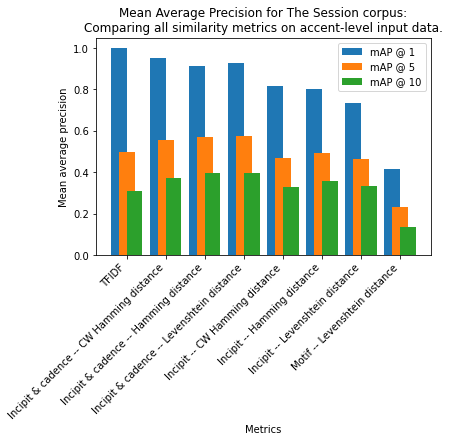

In [73]:
# Visualize results:

# def visualize_results(input_path, target_col, title, viz_outpath):
#     input_data = pd.read_csv(input_path, index_col="metric")
#     print(input_data.head())
#     viz = input_data.plot.bar(y=target_col, figsize=(12, 8), title=title)
#     plt.title(f'{title} for {tune_family_name}')
#     plt.savefig(fname=f"{viz_outpath}.png", bbox_inches="tight", dpi=360, facecolor='white', transparent=False)
#     plt.show()
input_data = corpus_level_map_results
# # Optional: remove cols from results visualisation
# input_data.drop([
#     'Incipit & cadence -- Cosine similarity',
#     'Incipit -- Cosine similarity',
#     'Levenshtein motif similarity -- presence',
#     'Levenshtein motif similarity -- presence (normalized)',
#     'Hamming motif similarity -- count (normalized)',
#     'Hamming motif similarity -- presence',
#     'Hamming motif similarity -- count',
#     'Hamming motif similarity -- presence (normalized)',
#     '(weighted) Hamming motif similarity -- count (normalized)',
#     '(weighted) Hamming motif similarity -- presence',
#     '(weighted) Hamming motif similarity -- count',
#     '(weighted) Hamming motif similarity -- presence (normalized)'
# ],
#     inplace=True
# )

# # Re-name remaining cols:
# new_idx = ['Incipit & cadence -- Custom weighted Hamming distance',
#            'Incipit & cadence -- Hamming distance',
#            'Incipit & cadence -- Levenshtein distance',
#            'Incipit -- Hamming distance',
#            'Incipit -- Custom weighted Hamming distance',
#            'Incipit -- Levenshtein distance',
#            'Motif -- Levenshtein distance',
#            'Motif -- Levenshtein distance (normalized)',
#            'TFIDF']
#
# input_data = input_data.set_index(pd.Index(new_idx), 'metric')
#
# input_data = input_data.reindex([
#     'TFIDF',
#     'Incipit & cadence -- Custom weighted Hamming distance',
#     'Incipit & cadence -- Hamming distance',
#     'Incipit & cadence -- Levenshtein distance',
#     'Incipit -- Custom weighted Hamming distance',
#     'Incipit -- Hamming distance',
#     'Incipit -- Levenshtein distance',
#     'Motif -- Levenshtein distance',
#     'Motif -- Levenshtein distance (normalized)'])

input_data  = input_data.T
tfidf = input_data.pop('TFIDF')
input_data.insert(0, "TFIDF", tfidf)
input_data  = input_data.T
print(input_data)
input_data.to_csv(root_dir + 'results_table_PAPER.csv')



x = input_data.index
x_axis = np.arange(len(x))
mAPat1 = input_data['mAP @ 1']
mAPat5 = input_data['mAP @ 5']
mAPat10 = input_data['mAP @ 10']

plt.bar(x_axis - 0.2, mAPat1, 0.4, label = 'mAP @ 1')
plt.bar(x_axis, mAPat5, 0.4, label = 'mAP @ 5')
plt.bar(x_axis + 0.2, mAPat10, 0.4, label = 'mAP @ 10')
plt.xticks(x_axis, x)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Metrics")
plt.ylabel("Mean average precision")
plt.title("Mean Average Precision for The Session corpus:\nComparing all similarity metrics on accent-level input data.")
plt.legend()
graph_out_path = root_dir + 'mean_average_precision_for_all_metrics_PAPER'
plt.savefig(fname=f"{graph_out_path}.png", bbox_inches="tight", dpi=360, facecolor='white', transparent=False)
plt.show()





In [65]:
# Additional visualisations for reporting:



In [11]:
# TODO: Revise tune family member assignment with expert input (and informed by results -- can we find previously-unknown tune family members?)
# TODO: Should search term tune be removed from results?
# TODO: Explore local alignment -- LCSS & Needleman Wunch in particular
# TODO: Explore structural heuristics / metrics and structural algorithms (entropy; pattern occurrences/onsets, replication of Seán Doherty's work)
# TODO: Combine structural and melodic results, and/or multiple metrics at different levels. EG: Incipit @ note-level plus TFIDF cosine @ accent plus entropy
# TODO: Explore ML options to implement in parallel?
# TODO: Add custom Levenshtein weights, try shorter incipits.

# Clean up this notebook and refactor corpus_processing_tools.py for next deliverable.
# Write up and potentially prep for publication?
# Image to aid meeting on 1st Dec.

# Additional corpora: Meertens, Essen, ITMA ...
# PDP, GRC, course registration, & fees; exchange within Polifonia; Marie Curie

# Results observations:
# Best performing metrics perform better than they did in the last experiment, worse-performing metrics performing worse than in previous experiment.
# Decline of motific metrics may be due to excess of similar patterns due to normalising effect of switch from chromatic to diatonic input data. This may be worth further exploration: try chromatic input data with a higher Levenshtein threshold and/or custom weightings alongside diatonic with low threshold and custom weightings.
# ITM: Effectiveness of incipit plus cadence method somewhat supports MÓS's paper (though more effective so far at note rather than accent-level). Try again with shorter accents at note-level in particular, with custom weightings and possibly an adjusted distance threshold.
# Headline [for me]: in the accent-level TF-IDF results we have a unique high-performing metric combining ITM knowledge plus classical ML. Although performance is not best in class, it is extremely fast and run locally on large datasets in minutes. In this respect it is best in class.